In [1]:
%cd ..

/mnt/e/projects/face_recognition


(384, 384, 3)


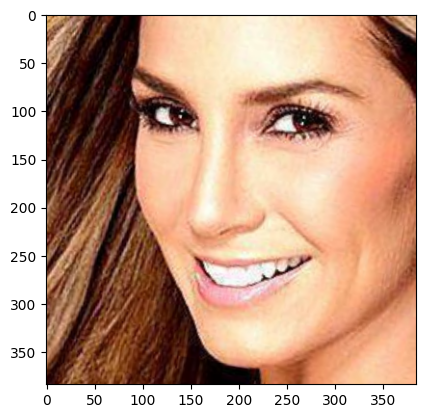

In [2]:
import os

import matplotlib.pyplot as plt
import pandas as pd

from config import CFG
from face_alignment import face_alignment, process_face_alignment

face_file_path = "./CelebA/img_celeba_mini/000001.jpg"


img = face_alignment(face_file_path)
print(img.shape)
plt.imshow(img)

In [3]:
# TODO: пизда крутит долго распаралелить!
# process_face_alignment(CFG.img_folder_src, CFG.img_folder_dst)

In [4]:
df_identity = pd.read_csv(CFG.identity_path, sep=" ", header=None).sort_values(by=0).reset_index(drop=True)
df_identity.columns = ["image", "label"]
# df_identity.img_path = df_identity.img_path.map(lambda path: str(CFG.IMG_FOLDER_PATH / Path(path)))
print(df_identity.shape)
df_identity.head(3)

(202599, 2)


,image,label
0,000001.jpg,2880
1,000002.jpg,2937
2,000003.jpg,8692


In [5]:
cropped_imgs = os.listdir(CFG.img_folder_dst)
data = pd.DataFrame({"image": cropped_imgs})

data = data.join(df_identity.set_index("image"), on="image", how="left")
data.shape
# найс было 202599 стало 194716 немножко потеряли, ну пофиг, зато кропнули норм

(194716, 2)

<Axes: ylabel='Frequency'>

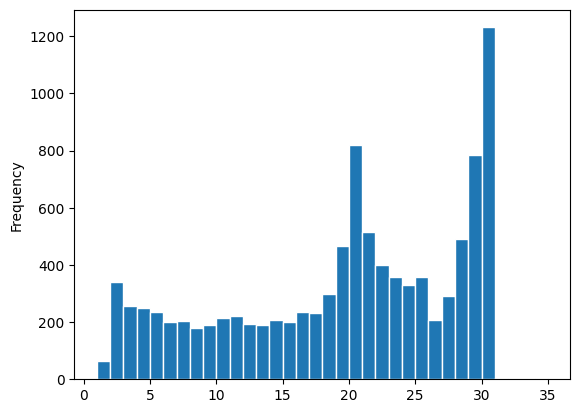

In [6]:
data_tmp = data.groupby(["label"]).agg({"label": "count"}).rename(columns={"label": "label_count"})
bins_amount = len(data_tmp["label_count"].unique())
data_tmp["label_count"].plot.hist(bins=bins_amount, edgecolor="white")

In [7]:
# # удалим из датасета, тех людей, у которых <= 10 фото
# удалим из датасета, те
# после удалаения ещё осалось 183077 картинок
del_label = data_tmp.loc[data_tmp.label_count <= 10, :].index.values
mask = data["label"].isin(set(del_label))
data = data[~mask].reset_index(drop=True)
data.shape

(183077, 2)